In [25]:
import sys
sys.path.append('..')

In [43]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import json

In [27]:
from utils.hmmtools import HmmerTools
from utils import helper

In [28]:
root = '../..'
data_path = os.path.join(root, 'Data')
hmm_path = os.path.join('../hmm')

In [29]:
a_amylase_catalytic_hmm = os.path.join(hmm_path, 'PF00128.hmm')
a_amylase_all_beta_hmm = os.path.join(hmm_path, 'PF02806.hmm')

In [30]:
seq_425 = os.path.join(data_path, 'sequences_425.fasta')
seq_not_425 = os.path.join(data_path, 'sequences_not_425.fasta')

In [38]:
hmms = [a_amylase_catalytic_hmm, a_amylase_all_beta_hmm]
hmmer = HmmerTools()
E_values = []
for hmm in hmms:
    df = hmmer.hmmsearch(hmm_path=hmm, fasta_file=seq_425)
    E_values.append(-np.log(df['Evalue']))

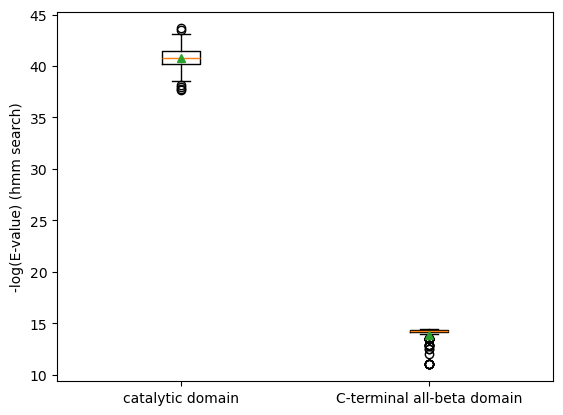

In [39]:
fig, ax = plt.subplots(1,1)
vp = ax.boxplot(E_values, showmeans=True)
_ = ax.set_ylabel('-log(E-value) (hmm search)')
_ = ax.set_xticks(ticks=range(1, len(E_values) + 1), 
              labels=['catalytic domain', 'C-terminal all-beta domain'])

In [40]:
E_values[0].shape, E_values[1].shape

((128,), (128,))

In [41]:
hmms = [a_amylase_catalytic_hmm, a_amylase_all_beta_hmm]
hmmer = HmmerTools()
E_values = []
for hmm in hmms:
    df = hmmer.hmmsearch(hmm_path=hmm, fasta_file=seq_not_425)
    E_values.append(-np.log(df['Evalue']))

In [42]:
E_values

[Series([], Name: Evalue, dtype: float64),
 Series([], Name: Evalue, dtype: float64)]

In [44]:
meta_file = os.path.join(data_path, 'sequences_425.metadata.json')
with open(meta_file) as f:
    seq_425_meta = json.load(f)
seq_425_meta = pd.DataFrame(seq_425_meta).T

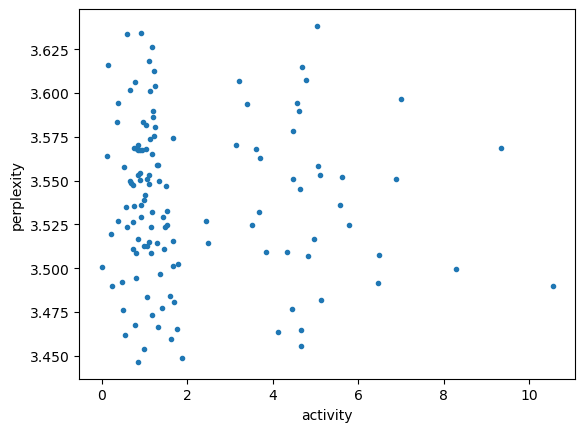

In [47]:
_ = plt.plot(seq_425_meta['activity'], seq_425_meta['esm2_650M_perplexity'], '.')
_ = plt.xlabel('activity')
_ = plt.ylabel('perplexity')